In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import keras
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.datasets import load_files
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, zero_one_loss, f1_score, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
train_data = '/content/fruits-360/Train'
test_data = '/content/fruits-360/Test'
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_data)
x_test, y_test,_ = load_dataset(test_data)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  67692
Testing set size :  22688


In [ ]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        img = load_img(file)  #read an image 
        images_array= img_to_array(img)   #convert image to NumPy array
        images_as_array.append(images_array.flatten()) #flatten the image array and append it to images_as_array
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 30000)
Validation set shape :  (7000, 30000)
Test set shape :  (22688, 30000)
1st training image shape  (30000,)


In [ ]:
#features scaling
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform (x_test)


In [ ]:
no_of_classes = len(np.unique(y_train))
y_train = to_categorical(y_train,no_of_classes)
y_test = to_categorical(y_test,no_of_classes)

In [ ]:
x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]

In [ ]:
input_size = x_train.shape[1]
model = Sequential()
model.add(Dense(600, activation = 'relu' , input_dim=input_size))
model.add(Dropout(0.30))
model.add(Dense(600, activation ='relu'))
model.add(Dropout(0.30))
model.add(Dense(600, activation ='relu'))
model.add(Dropout(0.30))
model.add(Dense(600, activation ='relu'))
model.add(Dropout(0.30))
model.add(Dense(600, activation ='relu'))
model.add(Dropout(0.30))
model.add(Dense(600, activation ='relu'))
model.add(Dropout(0.30))
model.add(Dense(600, activation ='relu'))

model.add(Dense(131,activation= 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam',metrics=['accuracy'])
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 6, 
                                           mode = 'min', verbose=1, restore_best_weights= True)

In [ ]:
history = model.fit(x_train, y_train, epochs=30 , batch_size=80, 
                    validation_data= (x_valid, y_vaild), shuffle= True,  callbacks = [early_stop])

Epoch 1/30
847/847 [==============================] - 87s 102ms/step - loss: 2.5583 - accuracy: 0.3109 - val_loss: 1.5052 - val_accuracy: 0.5620
Epoch 2/30
847/847 [==============================] - 88s 104ms/step - loss: 1.1698 - accuracy: 0.6458 - val_loss: 0.9166 - val_accuracy: 0.7470
Epoch 3/30
847/847 [==============================] - 88s 104ms/step - loss: 0.8153 - accuracy: 0.7646 - val_loss: 0.7075 - val_accuracy: 0.8041
Epoch 4/30
847/847 [==============================] - 88s 104ms/step - loss: 0.6995 - accuracy: 0.8118 - val_loss: 0.8824 - val_accuracy: 0.7917
Epoch 5/30
847/847 [==============================] - 88s 103ms/step - loss: 0.6282 - accuracy: 0.8391 - val_loss: 0.6994 - val_accuracy: 0.8479
Epoch 6/30
847/847 [==============================] - 87s 103ms/step - loss: 0.5901 - accuracy: 0.8553 - val_loss: 0.7891 - val_accuracy: 0.8401
Epoch 7/30
847/847 [==============================] - 87s 103ms/step - loss: 0.5965 - accuracy: 0.8600 - val_loss: 0.8308 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1, batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

123/123 [==============================] - 2s 14ms/step - loss: 0.6451 - accuracy: 0.8829
Test loss: 0.6450703740119934
Test accuracy: 88.29041123390198


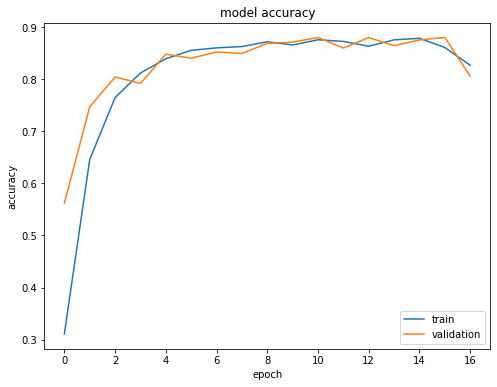

In [ ]:
figure,ax=plt.subplots(figsize=(8,6))
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='lower right')  
figure.savefig('model_accuracy_88.png')  
plt.show() 

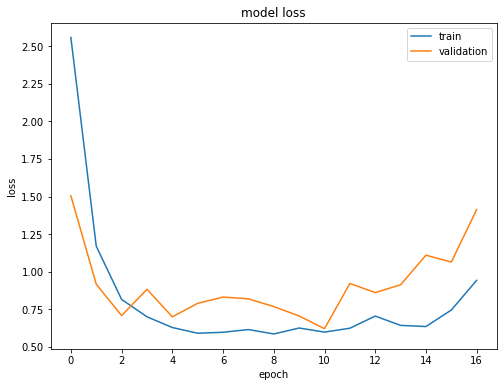

In [ ]:
figure,ax=plt.subplots(figsize=(8,6))
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper right')  
figure.savefig('model_loss_88.png')  
plt.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model_88.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_88.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model_88.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_88.h5")
print("Loaded model from disk")
 


Loaded model from disk


In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 88.29%


In [ ]:
#confusion matrix
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
accuracy = accuracy_score(y_true, y_pred_classes)
print('accuracy = ', accuracy)
f1 = f1_score(y_true, y_pred_classes, average ='micro')
print('f1_score = ', f1)
print('confusion_matrix  : \n ', conf_mat )


accuracy =  0.88290413054564
f1_score =  0.88290413054564
confusion_matrix  : 
  [[117   0   0 ...   0   0   0]
 [  0  87   0 ...   0   0   0]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ... 115   0   0]
 [  0   0   0 ...   0 171   0]
 [  0   0   0 ...   3   0 106]]


In [ ]:

print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       117
           1       0.84      0.86      0.85       101
           2       0.95      0.90      0.93       105
           3       1.00      1.00      1.00       110
           4       0.67      1.00      0.80       106
           5       0.93      0.96      0.95       119
           6       0.80      1.00      0.89       107
           7       1.00      0.72      0.84       114
           8       1.00      0.74      0.85       114
           9       0.92      0.59      0.72        97
          10       0.94      1.00      0.97       120
          11       0.93      0.79      0.86       117
          12       0.99      1.00      1.00       141
          13       1.00      1.00      1.00       106
          14       1.00      1.00      1.00       104
          15       0.83      1.00      0.91       109
          16       0.46      0.67      0.55       116
          17       0.74    

In [ ]:
zero_loss = zero_one_loss(y_true, y_pred_classes)
print('zero_one_loss: ' , zero_loss)

zero_one_loss:  0.11709586945436001
